In [11]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [12]:
DATA_DIR = "/home/p_vinsentds/maskrcnn-benchmark/datasets/micr/"

folder_train = "train2017/"
folder_val = "val2017/"
img_path   = DATA_DIR + folder_train
path_to_json = DATA_DIR + "annotations/"+ "instances_train2017.json"
folder_demo = "/home/p_vinsentds/maskrcnn-benchmark/demo/micr/"

In [13]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [14]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [15]:
config_file = "../configs/e2e_faster_rcnn_R_50_C4_1x_micr_pred.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [16]:
coco_demo = COCODemo(
        cfg,
       min_image_size= 800
    ) 

In [17]:
coco_demo

In [18]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment


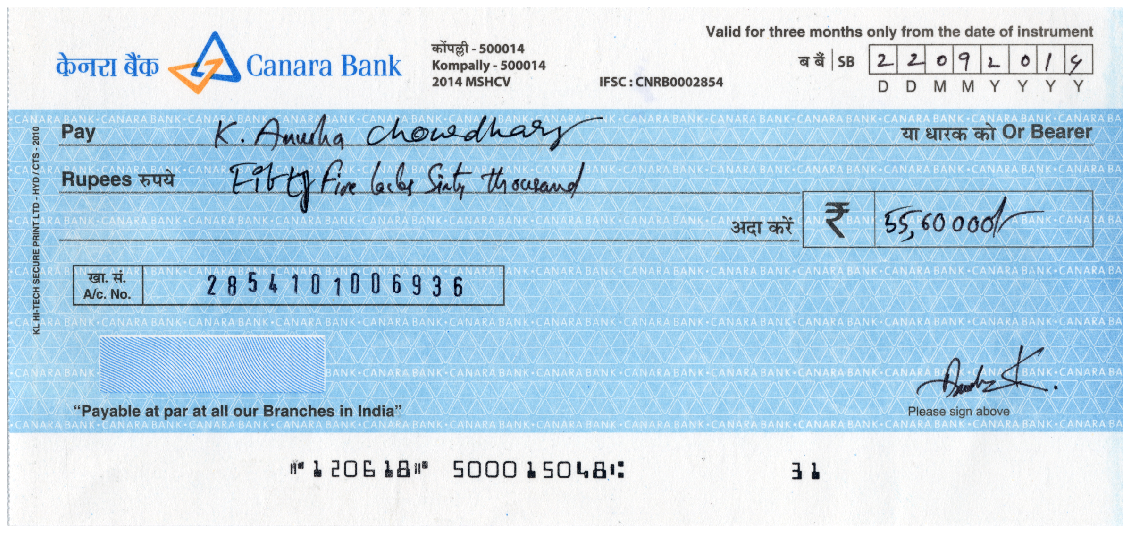

In [19]:
# from http://cocodataset.org/#explore?id=345434
# image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
# image = Image.open(folder_demo + '083655.jpg').convert("RGB")
# image = Image.open(folder_demo + '100831.jpg').convert("RGB")
image = Image.open(folder_demo + '120618.jpg').convert("RGB")
image = np.array(image)[:, :, [2, 1, 0]]

# image = Image.open(folder_demo + '100831.jpg').convert("RGB")
# image = Image.open(folder_demo + '120618.jpg').convert("RGB")
imshow(image)
# print(type(image))

## computing the predictions¶

We provide a run_on_opencv_image function, which takes an image as it was loaded by OpenCV (in BGR format), and computes the predictions on them, returning an image with the predictions overlayed on the image.


In [20]:
# compute predictions
# import pdb; pdb.set_trace()
# import pdb; pdb.set_trace()
predictions = coco_demo.run_on_opencv_image(image)

RuntimeError: cannot reshape tensor of 0 elements into shape [0, -1] because the unspecified dimension size -1 can be any value and is ambiguous